# Pytorchサンプルコード with Cifar10

## TODO : Deep Learningの処理の流れの説明
## TODO : 利用しているPytorchバージョンの記載（これは重要）
## TODO : cifar10についての説明（10クラスのみになる）

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Cifar10のデータセットの作成
## Pytorchや他のメジャーなDNNフレームワークでは、Cifar10などのような有名どころなデータセットは標準で実装されていることが多い。

## Cifar10のデータセットをロードする際に行う前処理を定義
### ToTensorは、PIL Imageやndarray(numpy)のデータを, channel * height * widthに変換する処理（Pytorchで扱いやすいデータの型にしていると考えれば良い）
### Normalizeは、各列の平均と標準偏差を指定して、正規化を行う処理（下記だと、channel方向ならば、平均0.5, 標準偏差0.5でデータを正規化する）
### ToTensor -> https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

## 学習用データセットの定義
## TODO : batchに関する説明
## TODO : shuffle=4の意味を確認
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=4, num_workers=2)

## テストデータセットの定義
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

## 分類ラベルの定義
### 元々cifar10では分類クラスが決まっている（10種類 -> だからcifar10）
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


shape is (3, 36, 138)


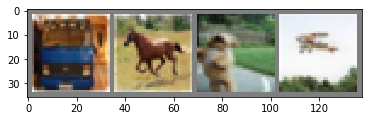

truck horse   dog plane


In [3]:
# 画像を描画してみます
## 平均0.5, 標準偏差0.5に設定しているため、画像描画時は元のデータに戻す処理を加えてます

import matplotlib.pyplot as plt
import numpy as np

# PytorchのTensorから画像を描画するための関数
def imshow(img):
    img = img / 2 + 0.5  # Normalizeしたデータを元に戻している
    npimg = img.numpy()
    print("shape is {}".format(npimg.shape))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # PIL Imageで読み込む際には、Height * Width * Channelにデータの順序を戻す必要があるため、Transposeで配列順序を入れ替えています
    plt.show()


# 学習用のDataLoaderから画像を試しに1バッチ分（= 4枚）取得
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 画像の表示を実施
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
# Cifar10の画像から、その画像が何か？（どのラベルに該当するか？）を判定するモデルを構築します
import torch.nn as nn
import torch.nn.functional as F

# TODO : モデルに関する説明の実施
class FCNet(nn.Module):
    def __init__(self, width=32, height=32, channel=3):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(width * height * channel, 720)
        self.fc2 = nn.Linear(720, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # 入力画像には、Tensor(Channel, Width, Height)が渡って来るため、FCレイヤーで計算できるように1次元に変換します(= Flatten)
        ## Flattenをやらずに、DataSet作成時に1次元なデータセットに変換する処理を実施してもOKです
        ## transforms.LinearTransformation を利用することになります( https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.LinearTransformation )
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# RGBな画像のため、チャネル数は3となります
net = FCNet()

In [5]:
# 損失関数と最適化手法の設定を行います
## TODO : 損失関数と最適化手法の説明の実施

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

start training....
[1,  2000] loss: 1.928
[1,  4000] loss: 1.705
[1,  6000] loss: 1.648
[1,  8000] loss: 1.607
[1, 10000] loss: 1.553
[1, 12000] loss: 1.535
1 epoch loss : 1.6583793594288827
[2,  2000] loss: 1.468
[2,  4000] loss: 1.429
[2,  6000] loss: 1.435
[2,  8000] loss: 1.417
[2, 10000] loss: 1.417
[2, 12000] loss: 1.412
2 epoch loss : 1.4295126037490369
[3,  2000] loss: 1.310
[3,  4000] loss: 1.320
[3,  6000] loss: 1.334
[3,  8000] loss: 1.331
[3, 10000] loss: 1.315
[3, 12000] loss: 1.327
3 epoch loss : 1.3218484068208933
[4,  2000] loss: 1.203
[4,  4000] loss: 1.241
[4,  6000] loss: 1.240
[4,  8000] loss: 1.249
[4, 10000] loss: 1.236
[4, 12000] loss: 1.256
4 epoch loss : 1.2368372427099943
[5,  2000] loss: 1.151
[5,  4000] loss: 1.153
[5,  6000] loss: 1.167
[5,  8000] loss: 1.180
[5, 10000] loss: 1.176
[5, 12000] loss: 1.184
5 epoch loss : 1.1680970277716218
[6,  2000] loss: 1.055
[6,  4000] loss: 1.083
[6,  6000] loss: 1.084
[6,  8000] loss: 1.140
[6, 10000] loss: 1.115
[6, 12

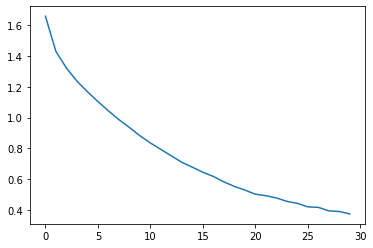

In [6]:
# 学習用のデータセットを用いて、モデルの学習を行います
## TODO : epoch, batchなどの用語説明を行う

# 1epochでデータセットに含まれる全データを利用して、一度学習処理をしたことになります。
# 例えば、5epochなら、全データを5回繰り返し利用して、学習したことになります。
print("start training....")
epoch_count = 30
epoch_losses = []
for epoch in range(1, epoch_count+1):
    # 1epochごとに全データを学習します
    ## バッチサイズごとに学習を実施し、損失（ロス）を算出します
    ## 損失結果を利用し、誤差逆伝播を行い、定義した最適化関数に応じた最適化処理（重み調整）を実施します
    train_loss = 0.0
    train_total_loss_in_1epoch = 0
    for i, data in enumerate(trainloader, 0):
        # バッチサイズ分の画像データがdataにラベル情報（cat, trainなど）と一緒に含まれています
        inputs, labels = data
        
        # 勾配情報（誤差逆伝播した際の差分情報）をバッチごとに初期化します
        ## 勾配情報は累積されるため、バッチサイズ単位で（勾配情報を利用して）最適化処理を行います。
        ## そのため、バッチサイズでの最適化処理が終われば、次のバッチサイズのデータで学習する前に勾配のリセットが必要となります。
        ## TODO : 勾配情報に関する説明（誤差逆伝播と一緒に説明する必要がある）
        optimizer.zero_grad()

        # モデルの順伝播、誤差逆伝播、最適化処理を実施します
        ## 順伝播の実施
        outputs = net(inputs)
        ## バッチサイズ分の損失を算出し、誤差逆伝播の実施
        loss = criterion(outputs, labels)
        loss.backward()
        ## 最適化処理の実施（パラメーターの調整処理）
        optimizer.step()

        # 学習状況を可視化する
        ## ロスの状況を可視化する。今回の場合だと、2000バッチ（=> 4 * 2000 = 8000データごと）ごとにロスを表示する
        train_loss += loss.item()
        ## 1epchごとのロスを算出するために、1バッチごとのロスを蓄積させる
        train_total_loss_in_1epoch += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch, i + 1, train_loss / 2000))
            train_loss = 0
    epoch_losses.append(train_total_loss_in_1epoch/len(trainloader))
    print("{} epoch loss : {}".format(epoch, train_total_loss_in_1epoch/len(trainloader)))
plt.plot(epoch_losses)

# 学習状況を保存します
import os

save_folder = "result"
os.makedirs(save_folder, exist_ok=True)
plt.savefig(os.path.join(save_folder, "train_result_epoch_{}.png".format(epoch_count)))
print("finish training....")

In [7]:
# 学習済みとなったモデルを保存します
model_foder = "model"
os.makedirs(model_foder, exist_ok=True)
saved_model_path = os.path.join(model_foder, "cifar_fcnet_epoch{}.pth".format(epoch_count))
torch.save(net.state_dict(), saved_model_path)

shape is (3, 36, 138)


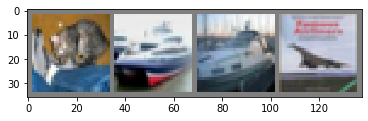

GroundTruth:    cat  ship  ship plane


In [8]:
# 作成したモデルを利用して、テストデータでも検証してみます
## まずはテストデータの中身を学習データと同様に表示してみます(1バッチ分の表示を行います)

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
## 学習済みモデルを復元しましょう

## 学習済みモデルのロードを行います
net = FCNet()
### OrderdDict形式（順序つき辞書形式）で,pathからパラメーター情報を取得する
param_dict = torch.load(saved_model_path)
### dict情報から、学習済みのモデルを復元する
net.load_state_dict(param_dict)

<All keys matched successfully>

In [10]:
## 次に1バッチ分のデータ（先ほど表示した画像）に対して、作成したモデルでの予測を試します
outputs = net(images)

### もっとも確度が高い予測ラベルのみを取得します
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog  ship  ship plane


In [11]:
### 試しに分類時のスコアと、他にどのような候補があがったかをみてみましょう
scores, predicted = torch.topk(outputs, k=3, dim=1)
for i in range(len(outputs)):
    print("## {} ##".format(i))
    for score, candidate in zip(scores[i], predicted[i]):
        print("predicted candidate/score : {}:{}".format(classes[candidate], score))

## 0 ##
predicted candidate/score : dog:10.59872817993164
predicted candidate/score : cat:7.241729259490967
predicted candidate/score : horse:5.271239757537842
## 1 ##
predicted candidate/score : ship:21.73072624206543
predicted candidate/score : car:15.980229377746582
predicted candidate/score : truck:13.255411148071289
## 2 ##
predicted candidate/score : ship:4.877150535583496
predicted candidate/score : truck:2.8075385093688965
predicted candidate/score : car:1.8830807209014893
## 3 ##
predicted candidate/score : plane:9.536497116088867
predicted candidate/score : horse:4.576657772064209
predicted candidate/score : deer:2.570402145385742


In [13]:
## 作成したモデルを利用して、テストデータに対して、精度を検証してみます
### 今回の精度検証では、TOP-1スコアでの精度検証となります。（画像分類タスクでは、TOP-1、TOP-5などのスコアがあったりします）
### TOP5の場合は、予測した結果、上位5個の分類結果内に正解ラベルがあれば、正しい分類とみなします。
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy Top1 of the network on the %d test images: %d %%' % (total, 100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [18]:
### TOP3のケースでも結果を算出してみましょう
correct = 0
total = 0
top_k = 3
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.topk(outputs, k=top_k, dim=1)
        total += labels.size(0)
        for i in range(labels.size(0)):
            if labels[i] in predicted[i]:
                correct += 1
print('Accuracy Top3 of the network on the %d test images: %d %%' % (total, 100 * correct / total))

Accuracy Top3 of the network on the 10000 test images: 81 %


In [21]:
### 単純に全体の精度を出すだけでなく、どのラベルの精度が高いか？低いか？を検証してみましょう
class_correct = list(0. for i in range(len(classes)))
class_total   = list(0. for i in range(len(classes)))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        # squeeze（各次元で1要素しかない場合に、該当する次元を削除する）を実施して、Tensorの構造をベクトルへと修正
        c = (predicted == labels).squeeze()
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# 各ラベルの正答率を表示します
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 59 %
Accuracy of  bird : 39 %
Accuracy of   cat : 29 %
Accuracy of  deer : 48 %
Accuracy of   dog : 53 %
Accuracy of  frog : 56 %
Accuracy of horse : 54 %
Accuracy of  ship : 61 %
Accuracy of truck : 58 %
